# Univariate, multivariate, encoding, normalization, and scaling

### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

### Load a data *file*

In [ ]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

## Univariate

### Find and remove Null

In [ ]:
df_dis = df['Distance']
len(df_dis)
df_dis.isnull().sum()
df_dis = df_dis.dropna()

### Plot

#### Histgram

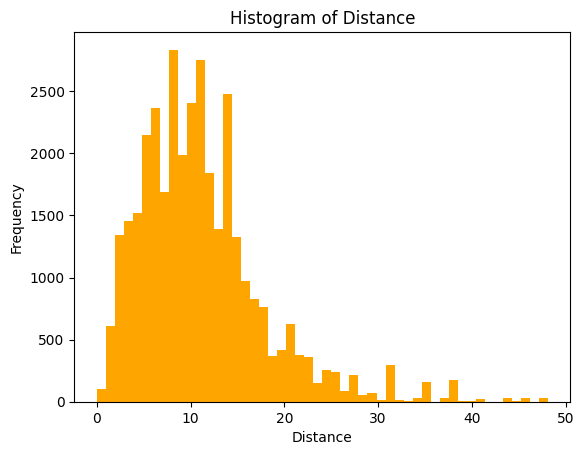

In [ ]:
plt.hist(df_dis, bins=50, color='orange')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distance')
plt.show()

#### Density

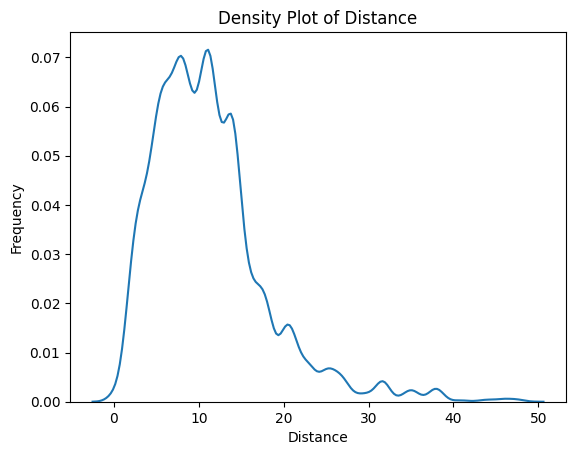

In [ ]:
sns.distplot(df_dis, hist=False)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Density Plot of Distance')
plt.show()

#### Violin plot

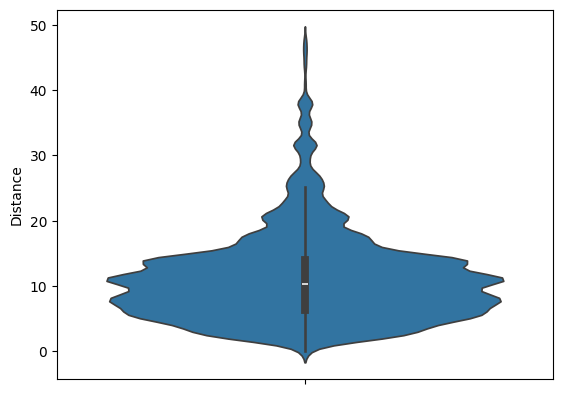

In [ ]:
sns.violinplot(df_dis)
plt.show()

#### Cumulative distribution

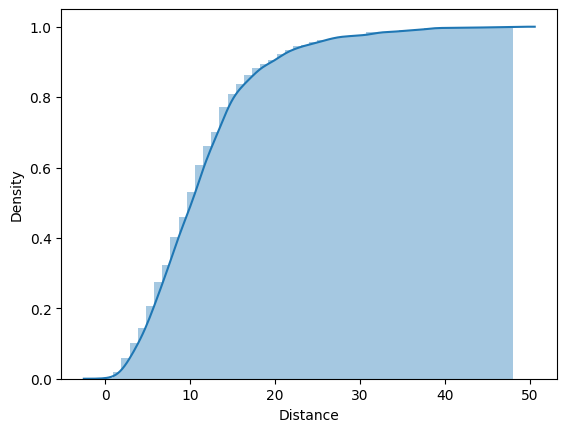

In [ ]:
sns.distplot(df_dis, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.show()

## Multivariate

### Remove NA

In [ ]:
df = df.dropna()

### Plot

#### Scatter plot

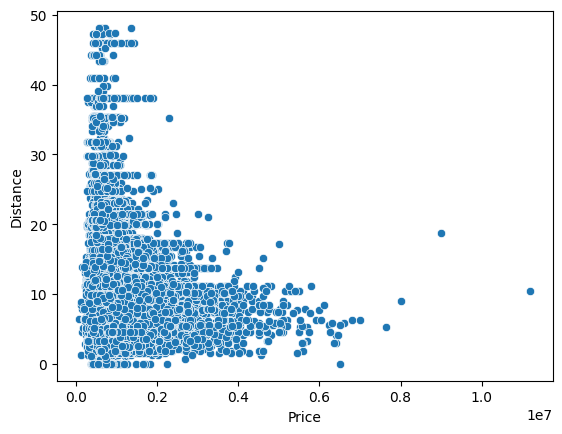

In [ ]:
sns.scatterplot(x='Price', y = 'Distance', data=df)
plt.show()

#### Correlation matrix and heatmap

##### The correlation matrix

In [ ]:
# seelct only numeric columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.000000,0.276490,0.084078,0.964475,0.624138,0.401395,0.101178,0.006944,0.019001,0.082831,-0.082604,0.475096
Distance,0.276490,1.000000,0.489550,0.283365,0.122035,0.259328,0.138568,0.313238,-0.055374,0.163922,-0.003173,-0.231222
Postcode,0.084078,0.489550,1.000000,0.087130,0.111470,0.055520,0.069603,0.089862,-0.195195,0.358014,0.032741,0.045962
Bedroom,0.964475,0.283365,0.087130,1.000000,0.626560,0.405543,0.101054,0.016320,0.022983,0.082491,-0.081207,0.460906
Bathroom,0.624138,0.122035,0.111470,0.626560,1.000000,0.310975,0.075939,0.192965,-0.041642,0.109141,-0.058255,0.463524
Car,0.401395,0.259328,0.055520,0.405543,0.310975,1.000000,0.123466,0.139322,0.015157,0.035530,-0.031244,0.209439
Landsize,0.101178,0.138568,0.069603,0.101054,0.075939,0.123466,1.000000,0.037696,0.042509,-0.008211,-0.032504,0.058394
YearBuilt,0.006944,0.313238,0.089862,0.016320,0.192965,0.139322,0.037696,1.000000,0.100042,-0.026872,0.017093,-0.313629
Latitude,0.019001,-0.055374,-0.195195,0.022983,-0.041642,0.015157,0.042509,0.100042,1.000000,-0.345845,0.029863,-0.224117
Longtitude,0.082831,0.163922,0.358014,0.082491,0.109141,0.035530,-0.008211,-0.026872,-0.345845,1.000000,0.026186,0.212117


##### The heatmap

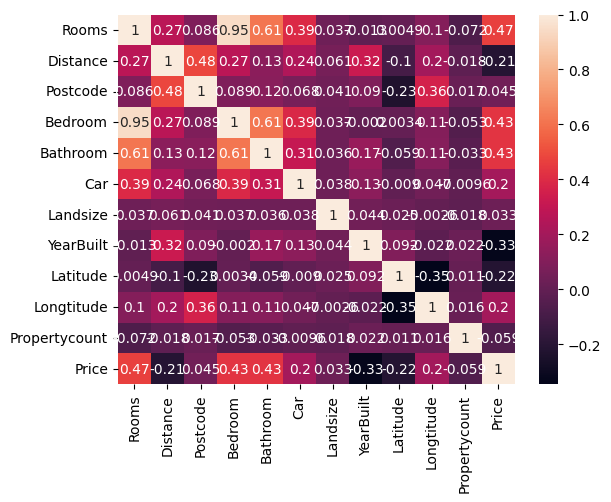

In [ ]:
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

##### The scatterplot

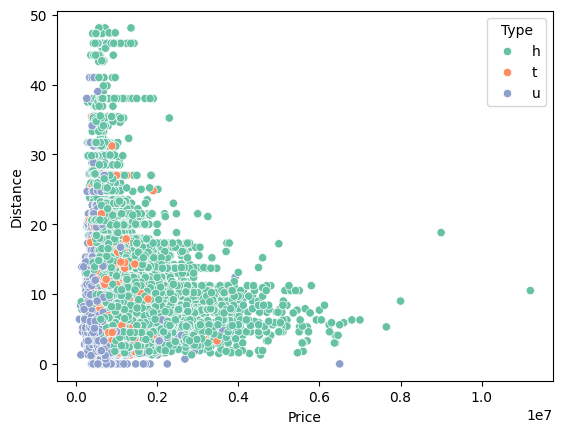

In [ ]:
sns.scatterplot(x='Price', y = 'Distance', data=df, hue=df['Type'], palette='Set2')
plt.show()

## Categorical Data

- One-Hot Encoding

One-hot encoding is a method used to convert categorical data (like text labels) into numerical format that can be used by machine learning models.
Using dummies, convert ['Red', 'Green', 'Blue'] to [(1,0,0), (0,1,0), (0,0,1)].

### One-hot encoding
- `pd.get_dummies(..)`
- Convert categorical data to True or False data

In [ ]:
df['ParkingArea'] # df.ParkingArea

,ParkingArea
0,Carport
1,Detached Garage
2,Attached Garage
3,Indoor
4,Parkade
...,...
34852,Parkade
34853,Underground
34854,Carport
34855,Detached Garage


In [ ]:
df_dummies = pd.get_dummies(df, prefix='park', columns=['ParkingArea'])
df_dummies

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Propertycount,Price,park_Attached Garage,park_Carport,park_Detached Garage,park_Indoor,park_Outdoor Stall,park_Parkade,park_Parking Pad,park_Underground
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,4019.0,NaN,False,True,False,False,False,False,False,False
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,3464.0,840000.0,False,False,True,False,False,False,False,False
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,3280.0,1275000.0,True,False,False,False,False,False,False,False
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,3280.0,1455000.0,False,False,False,True,False,False,False,False
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,2211.0,NaN,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,21650.0,475000.0,False,False,False,False,False,True,False,False
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,5833.0,591000.0,False,False,False,False,False,False,False,True
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,4054.0,NaN,False,True,False,False,False,False,False,False
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,4054.0,780500.0,False,False,True,False,False,False,False,False


### Label Encoding
- `LabelEncoder()`
- Convert Regionname column to numerical variables and create new column named RegionID

In [ ]:
df_dummies.Regionname.head(5)

,Regionname
0,Northern Metropolitan
1,Western Metropolitan
2,Southern Metropolitan
3,Southern Metropolitan
4,Northern Metropolitan


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_dummies['RegionId'] = LabelEncoder().fit_transform(df_dummies.Regionname)
df_dummies['RegionId'].head(5)

,RegionId
0,2
1,6
2,5
3,5
4,2


### One-Hot Encoding using sklearn

- `OneHotEncoder()`
- Convert RegionId column to values of 0 or 1 and create new column named RegionID


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoded = OneHotEncoder().fit_transform(df_dummies.RegionId.values.reshape(-1,1)).toarray()
encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

1. df_dummies.RegionId
- This accesses the RegionId column from the DataFrame df_dummies.

2. .values
- Extracts the column as a NumPy array.

3. .reshape(-1, 1)
- Reshapes the 1D array into a 2D array with one column (required format for OneHotEncoder).
- ['A', 'B', 'A'] → [['A'], ['B'], ['A']]

4. OneHotEncoder().fit_transform(...)
- Initializes the encoder.
- fit_transform():
  - fit: learns the unique values (e.g., A, B).
  - transform: converts each value into a one-hot encoded vector.
- Returns a sparse matrix.

5. .toarray()
- Converts the sparse matrix to a dense NumPy array so you can see the full binary values.

|Part |	Purpose |
|- | - |
|.values.reshape(-1, 1)	|Convert to correct input shape (2D array)|
|OneHotEncoder()|	Create encoder instance|
|.fit_transform(...)	|Learn and apply encoding|
|.toarray()	|Convert result to full NumPy array|


**Sparse vs dense matrix**

- A dense matrix is a regular matrix where most of the elements are non-zero.
- [[1, 2, 0],
 [0, 3, 4],
 [5, 6, 7]]
- A sparse matrix is a matrix where most elements are zero. Instead of storing all values, it only stores the locations and values of non-zero elements.
- [[0, 0, 1],
 [0, 0, 0],
 [2, 0, 0]]

*For python*
- OneHotEncoder by default returns a sparse matrix to save memory.
- If you want to see the full array, you convert it to a dense matrix using .toarray() or .todense().

In [ ]:
df_encoded = pd.DataFrame(encoded, columns = ["RegionId_"+str(int(i)) for i in range(encoded.shape[1])])
df_encoded.head()

,RegionId_0,RegionId_1,RegionId_2,RegionId_3,RegionId_4,RegionId_5,RegionId_6,RegionId_7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


1. encoded
- This is a NumPy array from one-hot encoding.
Shape: (number of rows, number of unique categories).

2. pd.DataFrame(encoded, ...)
- Converts the array into a DataFrame so it's easier to work with in pandas.

3. range(encoded.shape[1])
- Gets the number of columns in the encoded array (i.e., number of unique categories).

4. ["RegionId_" + str(int(i)) for i in range(...)]
- Creates column names like:['RegionId_0', 'RegionId_1', 'RegionId_2']
- Each one corresponds to a one-hot encoded column for a different category in RegionId.

In [ ]:
df_dummies = pd.concat([df_dummies, df_encoded], axis=1)
df_dummies.head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,park_Underground,RegionId,RegionId_0,RegionId_1,RegionId_2,RegionId_3,RegionId_4,RegionId_5,RegionId_6,RegionId_7
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,False,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,False,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,False,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,False,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,False,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


1. pd.concat([...], axis=1)
- pd.concat() is used to combine two or more pandas DataFrames.
- axis=1 means column-wise concatenation (i.e., add new columns to the right).

2. [df_dummies, df_encoded]
- This is the list of DataFrames to concatenate:
- df_dummies: your original DataFrame (with categorical column like RegionId).
- df_encoded: the one-hot encoded version of that column (e.g. RegionId_0, RegionId_1, etc.).

3. df_dummies = ...
- Reassigns the result back to df_dummies, so the DataFrame now includes both:
  - The original columns
  - The new one-hot encoded columns

## Normalization and Scaling
- Convert variables with different scales to a single scale.

### `StandardScaler()`

- z value
- $\large\frac{x - mean}{SD}$


In [ ]:
from sklearn.preprocessing import StandardScaler

df['Bedroom_Stdscale'] = StandardScaler().fit_transform(df[['Bedroom']])
df['Bedroom_Stdscale'].head()

,Bedroom_Stdscale
0,-1.106025
1,-0.086316
2,-1.106025
3,-1.106025
4,-0.086316


### `MinMaxScaler()`
$\large\frac{x - min}{max - min}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df['Car_MinMaxScale'] = MinMaxScaler().fit_transform(df[['Car']])
df['Car_MinMaxScale'].head(5)

,Car_MinMaxScale
0,0.038462
1,0.038462
2,0.000000
3,0.000000
4,0.038462


### FunctionTransformer


#### Log

In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
df['Distance']= df['Distance'].fillna(df['Distance'].mean())
df['Distance_logtransform'] = log_transformer.fit_transform(df[['Distance']])

df['Distance_logtransform'].head()

,Distance_logtransform
0,1.252763
1,2.674149
2,1.458615
3,1.458615
4,2.001480


#### Exponential

In [ ]:
exp_transformer = FunctionTransformer(np.exp)
df['Rooms_exptransform'] = exp_transformer.fit_transform(df[['Rooms']])
df['Rooms_exptransform'].head()

,Rooms_exptransform
0,7.389056
1,20.085537
2,7.389056
3,7.389056
4,20.085537
